In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from datetime import datetime
DATASET_PATH = "../Eingabedaten/"
GAS_PRICES = "../Eingabedaten/Benzinpreise/"

gas_stations_with_prices_id_list = [int(os.path.splitext(os.path.basename(os.path.join(GAS_PRICES, f)))[0]) for f in os.listdir(os.path.join(GAS_PRICES)) if os.path.isfile(os.path.join(GAS_PRICES, f))]

gas_stations = pd.DataFrame()

def load_gas_station_data(data_location=DATASET_PATH):
    gas_stations = os.path.join(data_location, "Tankstellen.csv")
    return pd.read_csv(gas_stations, sep=";", names=["id", "name", "brand", "street", "house_number", "zip_code", "city", "latitude", "longitude"])


def load_historic_prices(gas_station_id, data_location=DATASET_PATH):
    path = data_location + "Benzinpreise/{}.csv".format(gas_station_id)
    dateparse = lambda dates: pd.datetime.strptime(dates.split("+")[0], '%Y-%m-%d %H:%M:%S')
    historic_prices = os.path.join(path)
    return pd.read_csv(historic_prices, sep=";", header=None, parse_dates=[0],index_col=0, names=["date","price"],date_parser=dateparse)

# test station

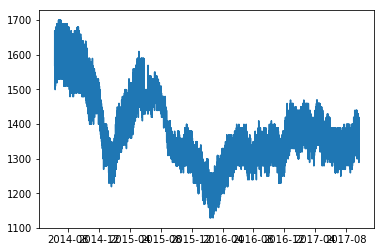

In [2]:
from datetime import datetime
data = load_historic_prices(12304)
plt.plot(data)

In [3]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
  

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# make example stationary

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


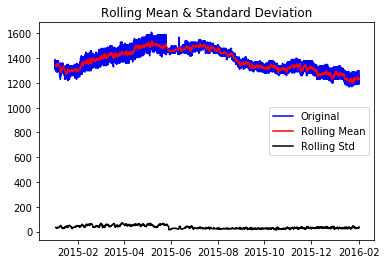

In [4]:
test_stationarity(data[datetime(2015,1,1):datetime(2016,2,1)])

In [5]:
data_log = np.log(data)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


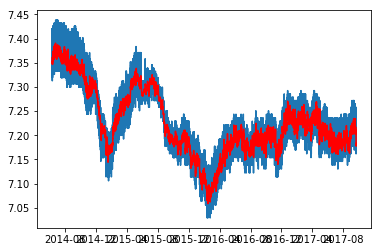

In [6]:
moving_avg = pd.rolling_mean(data_log,12)
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [7]:
ts_log_moving_avg_diff = data_log - moving_avg
ts_log_moving_avg_diff.head(12)

,price
date,
2014-06-08 09:50:01,NaN
2014-06-08 15:06:01,NaN
2014-06-09 00:02:01,NaN
2014-06-09 01:38:01,NaN
2014-06-09 15:06:01,NaN
2014-06-09 22:54:01,NaN
2014-06-10 01:58:01,NaN
2014-06-10 03:18:01,NaN
2014-06-10 04:22:01,NaN


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


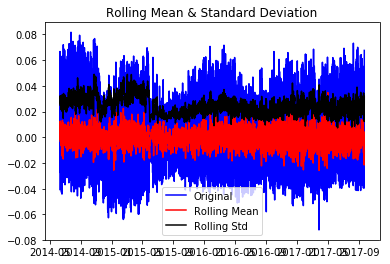

In [8]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


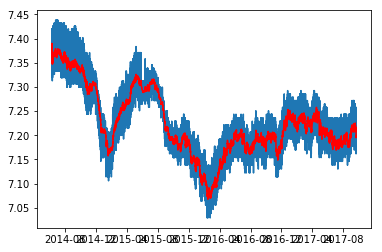

In [9]:
expwighted_avg = pd.ewma(data_log, halflife=12)
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


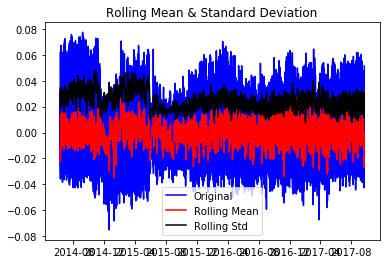

In [10]:
ts_log_ewma_diff = data_log- expwighted_avg
test_stationarity(ts_log_ewma_diff)

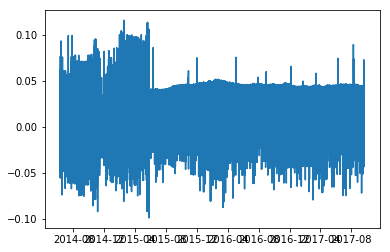

In [11]:
ts_log_diff = data_log - data_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


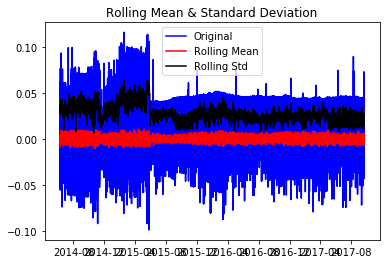

In [12]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

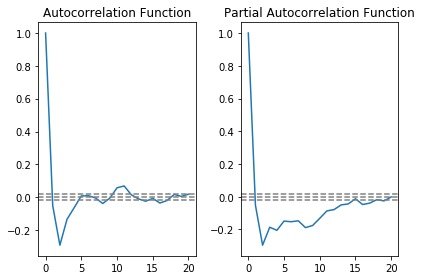

In [13]:


#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [48]:

data_new = (data) 

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_new, order=(2,1,2),enforce_invertibility=False) 
results_ARIMA = model.fit(disp=-1)  


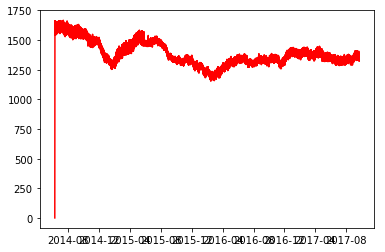

In [49]:
plt.plot(results_ARIMA.fittedvalues, color='red')

In [50]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2014-06-08 09:50:01       0.000000
2014-06-08 15:06:01    1568.860257
2014-06-09 00:02:01    1662.016500
2014-06-09 01:38:01    1588.647833
2014-06-09 15:06:01    1565.217487
dtype: float64


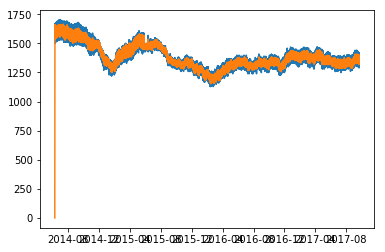

In [64]:

plt.plot(data)
plt.plot(predictions_ARIMA_diff)


In [105]:
results_ARIMA.predict(alpha=0.05, start=0, end=len(data)+40)

0           0.000000
1        1568.860257
2        1662.016500
3        1588.647833
4        1565.217487
5        1657.014193
6        1572.825642
7        1572.283042
8        1572.533278
9        1568.182220
10       1562.200333
11       1555.636965
12       1548.857694
13       1548.584500
14       1539.754692
15       1616.991279
16       1624.044848
17       1549.061716
18       1544.250011
19       1555.796268
20       1559.507166
21       1553.969749
22       1549.358145
23       1544.855345
24       1540.174737
25       1617.348570
26       1618.198911
27       1552.858161
28       1559.720995
29       1554.674317
            ...     
11224    1338.423917
11225    1338.587749
11226    1338.798519
11227    1338.925728
11228    1338.954032
11229    1338.925538
11230    1338.886484
11231    1338.862106
11232    1338.856103
11233    1338.861019
11234    1338.868242
11235    1338.872904
11236    1338.874158
11237    1338.873318
11238    1338.871985
11239    1338.871095
11240    1338

price    11213
dtype: int64